In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
print(tf.__version__)

1.15.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install num2words

     |████████████████████████████████| 102kB 2.8MB/s 


In [0]:
import os
import re
import numpy as np
import pandas as pd
from num2words import num2words
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [0]:
import tensorflow as tf

In [7]:
pwd

'/content'

In [8]:
cd /content/drive/My Drive/BA/

/content/drive/My Drive/BA


In [0]:
def getFile(cwd):
    cols = ['ID', 'CATEGORY', 'DELAY', 'IP', 'IP VALUE', 'CUES']
    for k,j in enumerate([i for i in os.listdir(cwd) if i.endswith(".xlsx")]):
        file = pd.read_excel(j)
        file = file[file['CUES'].notnull()]
        file = file[file['CUES'].str.len() >22]
        file = file[['ChoiceTextEntryValue' not in x for x in file['CUES']]]
        file = file[file['CATEGORY']=='EFT'].reset_index(drop=True)
        file['IP VALUE'] = file['IP VALUE'].astype(float)
        if file['IP VALUE'].max()>100:
            file['IP VALUE'] = file['IP VALUE']/10
        file_ = file[cols]
        if k == 0:
            imd = file[cols]
            continue
        file_imd = pd.concat([imd, file_])
        imd = file_imd
    return imd.reset_index(drop=True)

In [0]:
df = getFile(os.getcwd())

In [11]:
df.shape

(1190, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 6 columns):
ID          1190 non-null object
CATEGORY    1190 non-null object
DELAY       1190 non-null int64
IP          1190 non-null object
IP VALUE    1169 non-null float64
CUES        1190 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 55.9+ KB


In [0]:
df = df[df['IP VALUE'].notnull()].reset_index(drop=True)

In [14]:
df.shape

(1169, 6)

In [15]:
df

,ID,CATEGORY,DELAY,IP,IP VALUE,CUES
0,VT2MD206,EFT,30,IP30,99.22,In about a month I am unpacking moving boxes a...
1,VT2MD206,EFT,180,IP180,99.22,"In about 6 months I am on a cruise ship, I am ..."
2,VT2MD206,EFT,365,IP365,99.22,In about a year I am at a cousins weekend get ...
3,VT2MD206,EFT,30,IP30,99.22,In about a month I am unpacking moving boxes a...
4,VT2MD206,EFT,180,IP180,99.22,"In about 6 months I am on a cruise ship, I am ..."
...,...,...,...,...,...,...
1164,72 MS1072,EFT,180,IP180,89.84,I am at Cleveland stadium watching a baseball ...
1165,72 MS1072,EFT,365,IP365,89.84,I am in Las Vegas for a long anticipated vacat...
1166,73 MS1073,EFT,30,IP30,50.78,I am turning 29 soon. I will greatly enjoy thi...
1167,73 MS1073,EFT,180,IP180,39.84,In just under three months I am at the Pensaco...


In [0]:
# c = []
def correctReviews(df, delay, cues):
    # global c
    for i,j,k in zip(range(delay.shape[0]),delay,cues):
        dl_time = int(j/30)
        dl_year = int(j/(30*12))
        k = k.lower()
        
        if re.search('month',k):
            # c.append('1')
            if dl_time > 1 and dl_time <= 12:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.month.",num2words(dl_time)+' months ',k , count=1))
            else:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.month.",num2words(dl_time)+' month ',k , count=1))
        
        elif re.search('year',k):
            # c.append('2')
            if dl_year > 1:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.year.",num2words(dl_year)+' years ',k , count=1))
            else:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.year.",num2words(dl_year)+' year ',k , count=1))
                
        elif re.search('week|mins',k):
            # c.append('1')
            if dl_time > 1 and dl_time <= 12:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.week.|\w+.mins",num2words(dl_time)+' months ',k , count=1))
            else:
                df['CUES'][i] =  re.sub(r'\s+', ' ', re.sub("\w+.week.|\w+.mins",num2words(dl_time)+' month ',k , count=1))
                
        else:
            # c.append('3')
            if dl_time > 1 and dl_time < 12:
                df['CUES'][i] = re.sub(r'\s+', ' ', "In about "+num2words(dl_time)+' months ' + k)
            elif dl_year == 1:
                df['CUES'][i] = re.sub(r'\s+', ' ', "In about "+num2words(dl_year)+' year ' + k)
            elif dl_year > 1:
                df['CUES'][i] = re.sub(r'\s+', ' ', "In about "+num2words(dl_year)+' years ' + k)
            else:
                df['CUES'][i] = re.sub(r'\s+', ' ', "In about "+num2words(dl_time)+' month ' + k)
            

In [0]:
correctReviews(df, df['DELAY'], df['CUES'])

In [18]:
df

,ID,CATEGORY,DELAY,IP,IP VALUE,CUES
0,VT2MD206,EFT,30,IP30,99.22,in about one month i am unpacking moving boxes...
1,VT2MD206,EFT,180,IP180,99.22,"in about six months i am on a cruise ship, i a..."
2,VT2MD206,EFT,365,IP365,99.22,in about one year i am at a cousins weekend ge...
3,VT2MD206,EFT,30,IP30,99.22,in about one month i am unpacking moving boxes...
4,VT2MD206,EFT,180,IP180,99.22,"in about six months i am on a cruise ship, i a..."
...,...,...,...,...,...,...
1164,72 MS1072,EFT,180,IP180,89.84,In about six months i am at cleveland stadium ...
1165,72 MS1072,EFT,365,IP365,89.84,In about one year i am in las vegas for a long...
1166,73 MS1073,EFT,30,IP30,50.78,In about one month i am turning 29 soon. i wil...
1167,73 MS1073,EFT,180,IP180,39.84,in just under six months i am at the pensacola...


In [19]:
df.isnull().sum()

ID          0
CATEGORY    0
DELAY       0
IP          0
IP VALUE    0
CUES        0
dtype: int64

In [0]:
def getLabel(var):
    if 0 < var <=10:
        return 0
    elif 10 < var <=20:
        return 1
    elif 20 < var <=30:
        return 2
    elif 30 < var <=40:
        return 3
    elif 40 < var <=50:
        return 4
    elif 50 < var <=60:
        return 5
    elif 60 < var <=70:
        return 6
    elif 70 < var <=80:
        return 7
    elif 80 < var <=90:
        return 8
    else:
        return 9

In [0]:
# def getLabel(var):
#   if var>90:
#     return 1
#   else:
#     return 0

In [0]:
df['LABEL'] = df['IP VALUE'].apply(getLabel)

In [23]:
df.head()

,ID,CATEGORY,DELAY,IP,IP VALUE,CUES,LABEL
0,VT2MD206,EFT,30,IP30,99.22,in about one month i am unpacking moving boxes...,9
1,VT2MD206,EFT,180,IP180,99.22,"in about six months i am on a cruise ship, i a...",9
2,VT2MD206,EFT,365,IP365,99.22,in about one year i am at a cousins weekend ge...,9
3,VT2MD206,EFT,30,IP30,99.22,in about one month i am unpacking moving boxes...,9
4,VT2MD206,EFT,180,IP180,99.22,"in about six months i am on a cruise ship, i a...",9


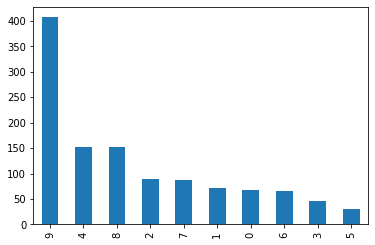

In [0]:
df['LABEL'].value_counts().plot("bar")

In [0]:
def getReviews(var1, var2, var3):
    for i,j,k,l in zip(var1, var2,range(var1.shape[0]),var3):
        print('Delay',i,k,l)
        print(j,end="\n\n")

In [0]:
getReviews(df['IP'], df['CUES'], df['DELAY'])

Delay IP30 0 30
in about one month i am unpacking moving boxes and decorating my new house for which i am signing a lease on tomorrow, in vinton va with my mother & aunt as i am unloading the moving truck, i am driving bringing our things. / 

Delay IP180 1 180
in about six months i am on a cruise ship, i am traveling with my entire family on a cruise ship headed for the bahamas that i booked yesterday.

Delay IP365 2 365
in about one year i am at a cousins weekend get together in arlington va and it thrills me.

Delay IP30 3 30
in about one month i am unpacking moving boxes and decorating my new house for which i am signing a lease on tomorrow, in vinton va with my mother & aunt as i am unloading the moving truck, i am driving bringing our things. / 

Delay IP180 4 180
in about six months i am on a cruise ship, i am traveling with my entire family on a cruise ship headed for the bahamas that i booked yesterday.

Delay IP365 5 365
in about one year i am at a cousins weekend get togethe

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [0]:
X = df.CUES
y = df.LABEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [0]:
print(f"train : {X_train.shape}")
print(f"test : {X_test.shape}")
print(f"train label : {y_train.shape}")
print(f"test label: {y_test.shape}")

train : (935,)
test : (234,)
train label : (935,)
test label: (234,)


In [0]:
train = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
test = pd.concat([X_test,y_test],axis=1).reset_index(drop=True)

In [27]:
! pip install bert-for-tf2

     |████████████████████████████████| 40kB 2.2MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.13.4-cp36-none-any.whl size=29942 sha256=2dfde203e49bcc873fce6573183145249620dc327a56bd49c427ca1f6908c195
  Stored in directory: /root/.cache/pip/wheels/d1/14/6d/b36f1618f939480ce5baa48e4d918ea00669f1cbbec4419514
  Created wheel for py-params: filename=py_params-0.8.2-cp36-none-any.whl size=4633 sha256=7799cb953632ecfd13246cf65bfa39942852599e06faf243c7d7a966af3be530
  Stored in directory: /root/.cache/pip/wheels/83/3a/9c/baf35d6f17f0c2c6b61bf8ac3ab9fc12df0e41432ccaeecacb
  Created wheel for params-flow: filename=params_flow-0.7.4-cp36-none-any.whl size=16196 sha256=7b7f71da38d8eb7ad2fcea9bf664b60b06085ea51f720389fb7f0664f0ca2580
  Stored in directory: /root/.cache/pip/wheels/86/30/40/507b60d68b67ac87f35e95c98f5b296a32f146d5ae1d1d5aa7
Successfully built bert-for-tf2 py-params params-flow


In [28]:
!pip install sentencepiece

     |████████████████████████████████| 1.0MB 3.4MB/s 


In [29]:
!pip install tqdm

In [0]:
from tqdm import tqdm

In [0]:
import bert,math
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights

In [0]:
from bert.tokenization.bert_tokenization import FullTokenizer

In [0]:
class BA:

    def __init__(self, tokenizer: FullTokenizer,train,test, max_seq_len=1024):
        self.tokenizer = tokenizer
        self.max_seq_len = 0
        self.train = train
        self.test = test
        
        ((self.train_x, self.train_y),
         (self.test_x, self.test_y)) = map(self._prepare, [self.train, self.test])

        print("max seq_len", self.max_seq_len)
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        ((self.train_x, self.train_x_token_types),
         (self.test_x, self.test_x_token_types)) = map(self._pad, 
                                                       [self.train_x, self.test_x])

    def _prepare(self, df_):
        x, y = [], []
        with tqdm(total=df_.shape[0], unit_scale=True) as pbar:
            for ndx, row in df_.iterrows():
                text, label = row['CUES'], row["LABEL"]
                tokens = self.tokenizer.tokenize(text)
                tokens = ["[CLS]"] + tokens + ["[SEP]"]
                token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
                self.max_seq_len = max(self.max_seq_len, len(token_ids))
                x.append(token_ids)
                y.append(int(label))
                pbar.update()
        return np.array(x), np.array(y)

    def _pad(self, ids):
        x, t = [], []
        token_type_ids = [0] * self.max_seq_len
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
            t.append(token_type_ids)
        return np.array(x), np.array(t)

In [0]:
def createTokenizer():
    modelsFolder = os.path.join(os.getcwd(), "uncased_L-12_H-768_A-12")
    vocab_file = os.path.join(modelsFolder, "vocab.txt")

    tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case=True)
    return tokenizer

In [35]:
%%time

tokenizer = createTokenizer()
data = BA(tokenizer, train, test, max_seq_len=128)

100%|██████████| 234/234 [00:00<00:00, 888it/s]

max seq_len 293
CPU times: user 1.33 s, sys: 42.1 ms, total: 1.37 s
Wall time: 1.66 s


In [0]:
print("            train_x", data.train_x.shape)
print("train_x_token_types", data.train_x_token_types.shape)
print("            train_y", data.train_y.shape)

print("             test_x", data.test_x.shape)

print("        max_seq_len", data.max_seq_len)

            train_x (935, 128)
train_x_token_types (935, 128)
            train_y (935,)
             test_x (234, 128)
        max_seq_len 128


In [0]:
tk = tokenizer.tokenize("in about one year i am going to los angeles.")
print(tk)
tks = ["[CLS]"] + tk + ["[SEP]"]
print(tks)
tk_ids = tokenizer.convert_tokens_to_ids(tks)
print(tk_ids)

['in', 'about', 'one', 'year', 'i', 'am', 'going', 'to', 'los', 'angeles', '.']
['[CLS]', 'in', 'about', 'one', 'year', 'i', 'am', 'going', 'to', 'los', 'angeles', '.', '[SEP]']
[101, 1999, 2055, 2028, 2095, 1045, 2572, 2183, 2000, 3050, 3349, 1012, 102]


In [0]:
tk = tokenizer.tokenize("in about six months i am going to los angeles.")
print(tk)
tks = ["[CLS]"] + tk + ["[SEP]"]
print(tks)
tk_ids = tokenizer.convert_tokens_to_ids(tks)
print(tk_ids)

['in', 'about', 'six', 'months', 'i', 'am', 'going', 'to', 'los', 'angeles', '.']
['[CLS]', 'in', 'about', 'six', 'months', 'i', 'am', 'going', 'to', 'los', 'angeles', '.', '[SEP]']
[101, 1999, 2055, 2416, 2706, 1045, 2572, 2183, 2000, 3050, 3349, 1012, 102]


In [0]:
tk = tokenizer.tokenize("in about six years i am going to los angeles.")
print(tk)
tks = ["[CLS]"] + tk + ["[SEP]"]
print(tks)
tk_ids = tokenizer.convert_tokens_to_ids(tks)
print(tk_ids)

['in', 'about', 'six', 'years', 'i', 'am', 'going', 'to', 'los', 'angeles', '.']
['[CLS]', 'in', 'about', 'six', 'years', 'i', 'am', 'going', 'to', 'los', 'angeles', '.', '[SEP]']
[101, 1999, 2055, 2416, 2086, 1045, 2572, 2183, 2000, 3050, 3349, 1012, 102]


In [0]:
tk = tokenizer.tokenize("i am going to los angeles in a day after tomorrow.")
print(tk)
tks = ["[CLS]"] + tk + ["[SEP]"]
print(tks)
tk_ids = tokenizer.convert_tokens_to_ids(tks)
print(tk_ids)

['i', 'am', 'going', 'to', 'los', 'angeles', 'in', 'a', 'day', 'after', 'tomorrow', '.']
['[CLS]', 'i', 'am', 'going', 'to', 'los', 'angeles', 'in', 'a', 'day', 'after', 'tomorrow', '.', '[SEP]']
[101, 1045, 2572, 2183, 2000, 3050, 3349, 1999, 1037, 2154, 2044, 4826, 1012, 102]


In [0]:
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling1D

In [0]:
def flatten_layers(root_layer):
    if isinstance(root_layer, keras.layers.Layer):
        yield root_layer
    for layer in root_layer._layers:
        for sub_layer in flatten_layers(layer):
            yield sub_layer


def freeze_bert_layers(l_bert):
    """
    Freezes all but LayerNorm and adapter layers - see arXiv:1902.00751.
    """
    for layer in flatten_layers(l_bert):
        if layer.name in ["LayerNorm", "adapter-down", "adapter-up"]:
            layer.trainable = True
        elif len(layer._layers) == 0:
            layer.trainable = False
        l_bert.embeddings_layer.trainable = False


def create_learning_rate_scheduler(max_learn_rate=5e-5,
                                   end_learn_rate=1e-7,
                                   warmup_epoch_count=10,
                                   total_epoch_count=90):

    def lr_scheduler(epoch):
        if epoch < warmup_epoch_count:
            res = (max_learn_rate/warmup_epoch_count) * (epoch + 1)
        else:
            res = max_learn_rate*math.exp(math.log(end_learn_rate/max_learn_rate)*(epoch-warmup_epoch_count+1)/(total_epoch_count-warmup_epoch_count+1))
        return float(res)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler

In [0]:
def create_model(max_seq_len, adapter_size=64):
  """Creates a classification model."""

  #adapter_size = 64  # see - arXiv:1902.00751
  modelsFolder = os.path.join(os.getcwd(), "uncased_L-12_H-768_A-12")
  bert_ckpt_file   = os.path.join(modelsFolder, "bert_model.ckpt")
  bert_config_file = os.path.join(modelsFolder, "bert_config.json")
  # create the bert layer
  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = adapter_size
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids      = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="input_ids")
  # token_type_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="token_type_ids")
  # output         = bert([input_ids, token_type_ids])
  output         = bert(input_ids)

  print("bert shape", output.shape)
  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(output)
  logits = keras.layers.Dense(units=256, activation="relu")(cls_out)
  
  logits = keras.layers.Dropout(0.5)(logits)
  
  logits = keras.layers.Dense(units=10, activation="softmax")(logits)

  # model = keras.Model(inputs=[input_ids, token_type_ids], outputs=logits)
  # model.build(input_shape=[(None, max_seq_len), (None, max_seq_len)])
  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  # load the pre-trained model weights
  load_stock_weights(bert, bert_ckpt_file)

  # freeze weights if adapter-BERT is used
  if adapter_size is not None:
      freeze_bert_layers(bert)

  model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])

  model.summary()
        
  return model

In [0]:
adapter_size = None # use None to fine-tune all of BERT
model = create_model(data.max_seq_len, adapter_size=adapter_size)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
bert shape (?, 128, 768)
Done loading 196 BERT weights from: /content/drive/My Drive/BA/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f2864ebd860> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weigh

In [0]:
import shutil

In [0]:
if os.path.isdir(os.getcwd()+'/'+'model'):
  shutil.rmtree(os.getcwd()+'/'+'model')
else:
  os.mkdir(os.getcwd()+'/'+'model')
  print("Directory created!")

Directory created!


In [0]:
import datetime

In [0]:
%%time

log_dir = os.getcwd()+'/'+'model' + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

total_epoch_count = 25
# model.fit(x=(data.train_x, data.train_x_token_types), y=data.train_y,
model.fit(x=data.train_x, y=keras.utils.to_categorical(data.train_y, 10),
          validation_split=0.1,
          batch_size=48,
          shuffle=True,
          epochs=total_epoch_count,
          callbacks=[create_learning_rate_scheduler(max_learn_rate=1e-5,
                                                    end_learn_rate=1e-7,
                                                    warmup_epoch_count=20,
                                                    total_epoch_count=total_epoch_count),
                     keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
                     tensorboard_callback])

model.save_weights('./movie_reviews.h5', overwrite=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 841 samples, validate on 94 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 5.000000000000001e-07.
Epoch 1/25
841/841 [==============================] - 31s 36ms/sample - loss: 2.4849 - acc: 0.1225 - val_loss: 2.2549 - val_acc: 0.1383

Epoch 00002: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
Epoch 2/25
841/841 [==============================] - 23s 27ms/sample - loss: 2.3315 - acc: 0.1605 - val_loss: 2.1047 - val_acc: 0.3191

Epoch 00003: LearningRateScheduler reducing learning rate to 1.5000000000000002e-06.
Epoch 3/25
841/841 [==============================] - 23s 28ms/sample - loss: 2.1827 - acc: 0.2616 - val_loss: 2.0642 - val_acc: 0.3404

Epoch 00004: LearningRateScheduler reducing learning rate to 2.0000000000000003e-06.
Epoch 4/25
841/841 [==============================] - 24s 29ms/sample - loss: 2.1390 - acc: 0.2747 - val_loss:

In [0]:
%%time

_, train_acc = model.evaluate(data.train_x, keras.utils.to_categorical(data.train_y, 10))
_, test_acc = model.evaluate(data.test_x, keras.utils.to_categorical(data.test_y, 10))

print("train acc", train_acc)
print(" test acc", test_acc)

234/234 [==============================] - 2s 10ms/sample - loss: 1.8750 - acc: 0.3675
train acc 0.40106952
 test acc 0.36752138
CPU times: user 2.69 s, sys: 636 ms, total: 3.33 s
Wall time: 11.3 s


In [0]:
print(classification_report(data.test_y,np.argmax(model.predict(data.test_x),axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        10
           4       0.12      0.12      0.12        32
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        14
           8       0.15      0.20      0.17        25
           9       0.47      0.83      0.60        92

    accuracy                           0.37       234
   macro avg       0.17      0.12      0.10       234
weighted avg       0.28      0.37      0.28       234

